# Figure1 : Average confusion matrixes for the 32x32 resolution across all experiments in Table 3

[:simple-jupyter: :material-download:](../../paper_tables_and_figures/figure1_confusion_matrix_supervised_setting/figure1_confusion_matrix_supervised_setting.ipynb)

In [2]:
import pathlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
folder_artifacts = pathlib.Path(
    "./campaigns/ucdavis-icdm19/augmentation-at-loading-with-dropout/artifacts/"
)

In [4]:
filelists = [
    list(folder_artifacts.glob("*/test-human_conf_mtx.csv")),
    list(folder_artifacts.glob("*/test-script_conf_mtx.csv")),
]

titles = ["human", "script"]

classes = ["google-doc", "google-drive", "google-music", "google-search", "youtube"]

/tmp/ipykernel_26554/3130660952.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.92, 1])


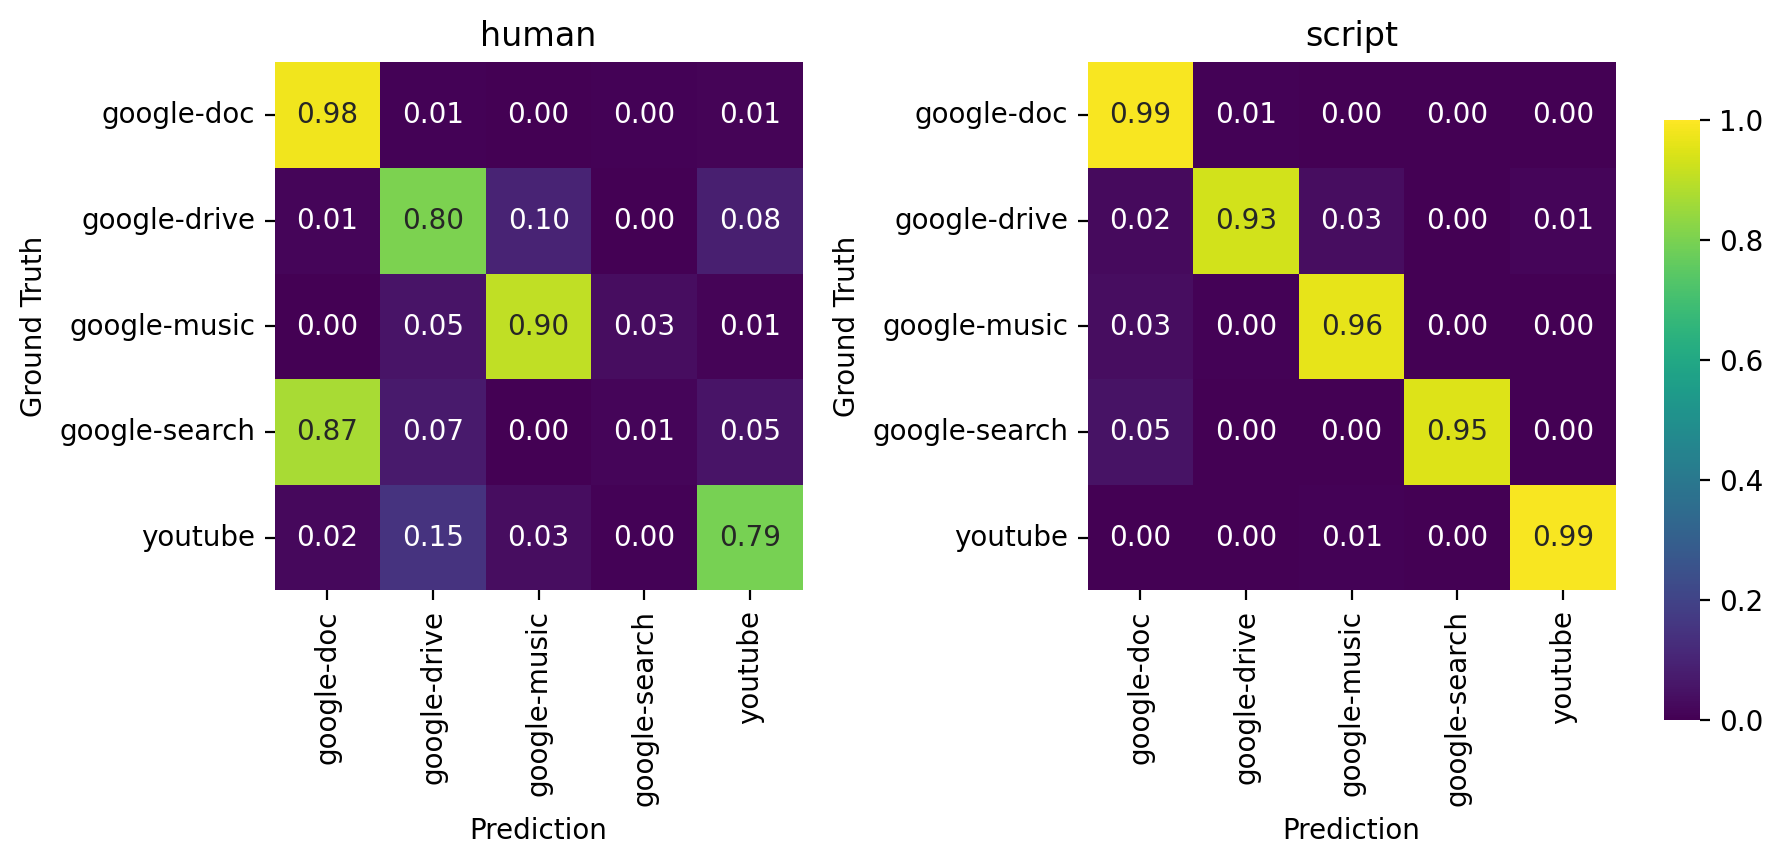

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
cbar_ax = fig.add_axes([0.93, 0.2, 0.02, 0.6])  # (left, bottom, width, height)
for i in range(2):
    cm_mean = np.mean(
        np.stack([pd.read_csv(file)[classes].values for file in filelists[i]]), axis=0
    )

    normed_cm_mean = normalize(cm_mean, axis=1, norm="l1")

    ax = axes[i]

    sns.heatmap(
        data=normed_cm_mean,
        ax=ax,
        square=True,
        cmap="viridis",
        annot=True,
        annot_kws={"size": 10},
        fmt=".2f",
        vmin=0,
        vmax=1,
        cbar=i == 0,
        cbar_ax=None if i else cbar_ax,
    )

    ax.set_xticklabels(classes, rotation=90)
    ax.set_yticklabels(classes, rotation=0)

    ax.set_title(titles[i])

    ax.set_ylabel("Ground Truth")
    ax.set_xlabel("Prediction")

fig.tight_layout(rect=[0, 0, 0.92, 1])
plt.show()